In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split




In [107]:
df=pd.read_csv(r"D:\gender.csv")

In [108]:
df.head(2)

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN


In [109]:
df.drop(['Unnamed: 9',' Education Level'], axis=1, inplace=True)


In [110]:
df.columns

Index([' Gender', ' Age', ' Height (cm)', ' Weight (kg)', ' Occupation',
       ' Marital Status', ' Income (USD)', ' Favorite Color'],
      dtype='object')

In [111]:
#for i in df.columns:
 #df.columns=df[i].str.strip()

In [112]:
df.columns=df.columns.str.strip(" ")

In [113]:
df.columns

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Marital Status', 'Income (USD)', 'Favorite Color'],
      dtype='object')

In [114]:
obj=[var for var in df.columns if df[var].dtype=='O']
print(obj)

['Gender', 'Occupation', 'Marital Status', 'Favorite Color']


In [115]:
#for que in obj:
    #print(df[que].value_counts())

In [116]:
obj

['Gender', 'Occupation', 'Marital Status', 'Favorite Color']

In [117]:
df['Gender']=df['Gender'].str.strip(' ')

In [118]:
df[['Occupation', 'Marital Status', 'Favorite Color']] = df[['Occupation', 'Marital Status', 'Favorite Color']].apply(lambda x: x.str.strip())


In [119]:
for que in obj:
    print(df[que].value_counts())

Gender
male      68
female    63
Name: count, dtype: int64
Occupation
Teacher                 12
Lawyer                   9
Doctor                   9
Engineer                 9
Writer                   9
Marketing Specialist     9
Graphic Designer         9
Nurse                    9
Project Manager          9
IT Manager               7
Sales Representative     7
Architect                7
Analyst                  6
CEO                      6
Accountant               6
Business Analyst         5
Software Engineer        1
Business Consultant      1
Software Developer       1
Name: count, dtype: int64
Marital Status
Married     65
Single      59
Divorced     5
Widowed      2
Name: count, dtype: int64
Favorite Color
Blue      21
Green     21
Purple    17
Red       17
Yellow    16
Black     12
Orange    12
Grey       8
Pink       7
Name: count, dtype: int64


In [120]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Married,75000,Blue
1,male,25,182,85,Sales Representative,Single,45000,Green
2,female,41,160,62,Doctor,Married,120000,Purple
3,male,38,178,79,Lawyer,Single,90000,Red
4,female,29,165,58,Graphic Designer,Single,35000,Yellow


In [121]:
df['Favorite Color'].value_counts()

Favorite Color
Blue      21
Green     21
Purple    17
Red       17
Yellow    16
Black     12
Orange    12
Grey       8
Pink       7
Name: count, dtype: int64

In [122]:
obj=[var for var in df.columns if df[var].dtype=='O']
print(obj)


['Gender', 'Occupation', 'Marital Status', 'Favorite Color']


In [123]:
df[obj]

,Gender,Occupation,Marital Status,Favorite Color
0,male,Software Engineer,Married,Blue
1,male,Sales Representative,Single,Green
2,female,Doctor,Married,Purple
3,male,Lawyer,Single,Red
4,female,Graphic Designer,Single,Yellow
...,...,...,...,...
126,female,Nurse,Single,Orange
127,male,Project Manager,Married,Black
128,female,Graphic Designer,Single,Green
129,male,Sales Representative,Married,Yellow


In [124]:
num=[var for var in df.columns if df[var].dtype!='O']
print(num)

['Age', 'Height (cm)', 'Weight (kg)', 'Income (USD)']


In [125]:
df[num]

,Age,Height (cm),Weight (kg),Income (USD)
0,32,175,70,75000
1,25,182,85,45000
2,41,160,62,120000
3,38,178,79,90000
4,29,165,58,35000
...,...,...,...,...
126,32,170,64,60000
127,38,176,79,90000
128,27,162,55,55000
129,33,175,77,80000


In [126]:
for i in df[obj]:
    print(df[i].unique())

['male' 'female']
['Software Engineer' 'Sales Representative' 'Doctor' 'Lawyer'
 'Graphic Designer' 'Business Consultant' 'Marketing Specialist' 'CEO'
 'Project Manager' 'Engineer' 'Accountant' 'Architect' 'Nurse' 'Analyst'
 'Teacher' 'IT Manager' 'Writer' 'Business Analyst' 'Software Developer']
['Married' 'Single' 'Divorced' 'Widowed']
['Blue' 'Green' 'Purple' 'Red' 'Yellow' 'Black' 'Pink' 'Orange' 'Grey']


In [127]:
le = LabelEncoder()

In [128]:
le = LabelEncoder()
for col in df[obj].columns:
    df[col] = le.fit_transform(df[col])

In [97]:
df.corr()

,Gender,Age,Height (cm),Weight (kg),Occupation,Marital Status,Income (USD),Favorite Color
Gender,1.000000,0.652428,0.900727,0.931097,-0.357526,-0.490923,0.394992,-0.239724
Age,0.652428,1.000000,0.726308,0.784738,-0.399623,-0.544266,0.662278,-0.062621
Height (cm),0.900727,0.726308,1.000000,0.975157,-0.355807,-0.505365,0.456217,-0.166699
Weight (kg),0.931097,0.784738,0.975157,1.000000,-0.376316,-0.517141,0.486022,-0.157756
Occupation,-0.357526,-0.399623,-0.355807,-0.376316,1.000000,0.273514,-0.316238,0.032626
Marital Status,-0.490923,-0.544266,-0.505365,-0.517141,0.273514,1.000000,-0.335189,0.138767
Income (USD),0.394992,0.662278,0.456217,0.486022,-0.316238,-0.335189,1.000000,-0.063144
Favorite Color,-0.239724,-0.062621,-0.166699,-0.157756,0.032626,0.138767,-0.063144,1.000000


In [129]:
df.head(5)

,Gender,Age,Height (cm),Weight (kg),Occupation,Marital Status,Income (USD),Favorite Color
0,1,32,175,70,16,1,75000,1
1,1,25,182,85,14,2,45000,2
2,0,41,160,62,6,1,120000,6
3,1,38,178,79,10,2,90000,7
4,0,29,165,58,8,2,35000,8


{'whiskers': [<matplotlib.lines.Line2D object at 0x0000016638C75730>, <matplotlib.lines.Line2D object at 0x000001663B128E60>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663B10C5C0>, <matplotlib.lines.Line2D object at 0x000001663B10FEC0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663B055CD0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663B10D8B0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663B10D790>], 'means': []}


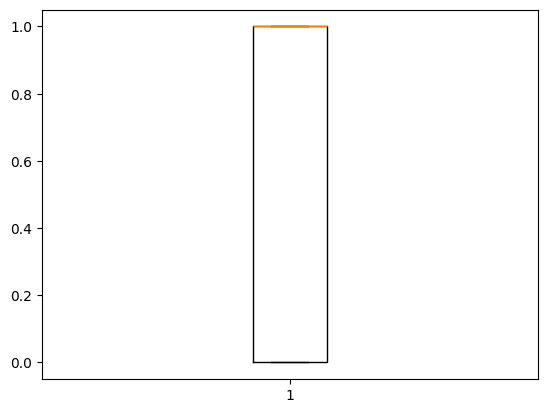

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001663B28E570>, <matplotlib.lines.Line2D object at 0x000001663B28E840>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663B28EB10>, <matplotlib.lines.Line2D object at 0x000001663B28EDB0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663B28E270>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663B28F050>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663B28F2F0>], 'means': []}


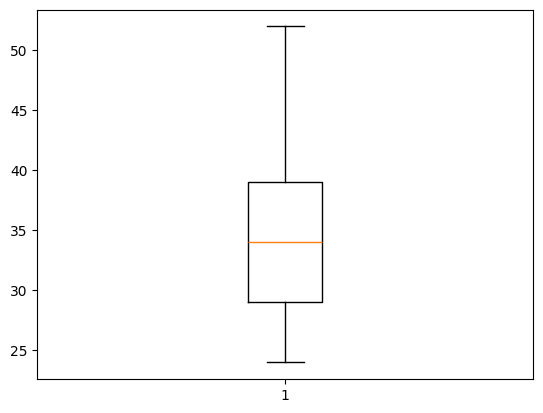

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001663B213D40>, <matplotlib.lines.Line2D object at 0x000001663B2123C0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663B212F90>, <matplotlib.lines.Line2D object at 0x000001663B213FE0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663B213B00>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663AED8EF0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663B252990>], 'means': []}


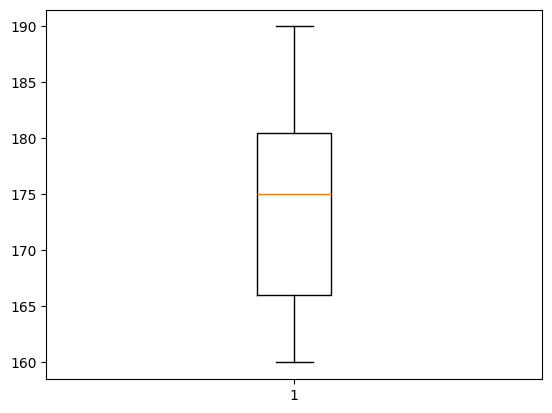

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001663C436330>, <matplotlib.lines.Line2D object at 0x000001663C436630>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663C436840>, <matplotlib.lines.Line2D object at 0x000001663C436A20>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663C436090>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663C436D20>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663C437020>], 'means': []}


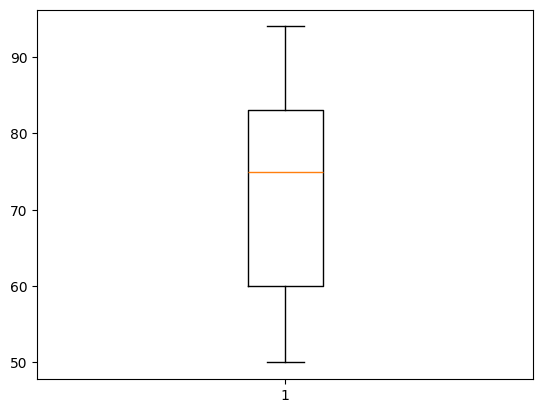

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001663C464CB0>, <matplotlib.lines.Line2D object at 0x000001663C4652B0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663C465850>, <matplotlib.lines.Line2D object at 0x000001663C465C40>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663C465190>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663C436060>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663C4363C0>], 'means': []}


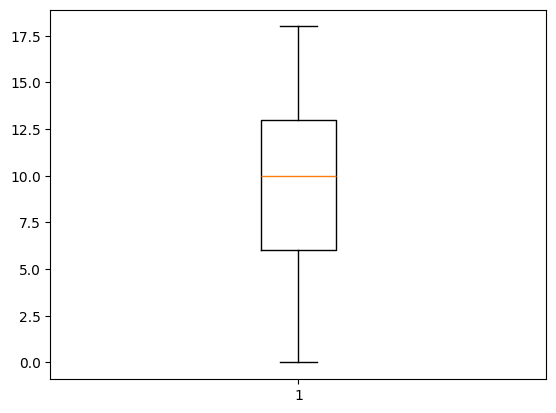

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001663B056A50>, <matplotlib.lines.Line2D object at 0x000001663B0DC5F0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663B0DE9F0>, <matplotlib.lines.Line2D object at 0x000001663B0DD6D0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663B055070>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663B0DF500>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663B1E3AA0>], 'means': []}


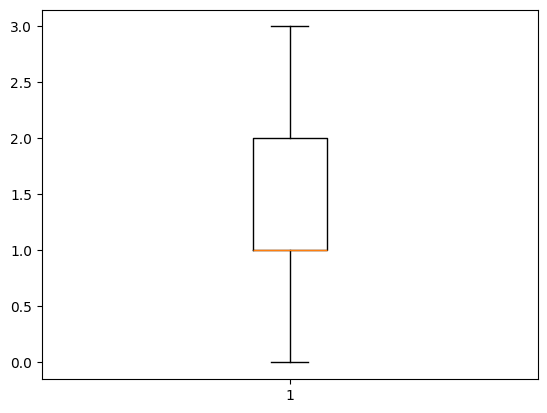

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001663C4B4FB0>, <matplotlib.lines.Line2D object at 0x000001663C4B5100>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663C4B53A0>, <matplotlib.lines.Line2D object at 0x000001663C4B55E0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663C4B4E30>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663C4B58B0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663C4B5BB0>], 'means': []}


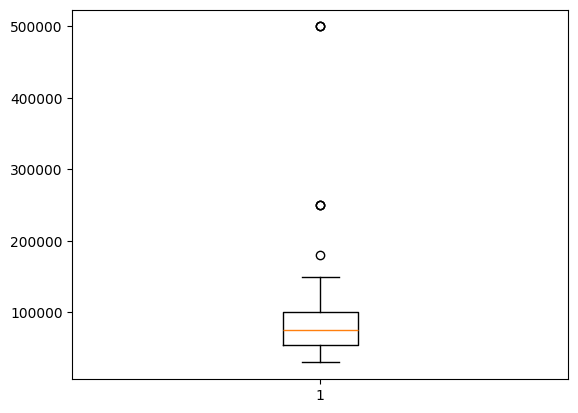

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001663C445C10>, <matplotlib.lines.Line2D object at 0x000001663C447110>], 'caps': [<matplotlib.lines.Line2D object at 0x000001663C4456A0>, <matplotlib.lines.Line2D object at 0x000001663C446090>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001663C447770>], 'medians': [<matplotlib.lines.Line2D object at 0x000001663C4448F0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001663C446E70>], 'means': []}


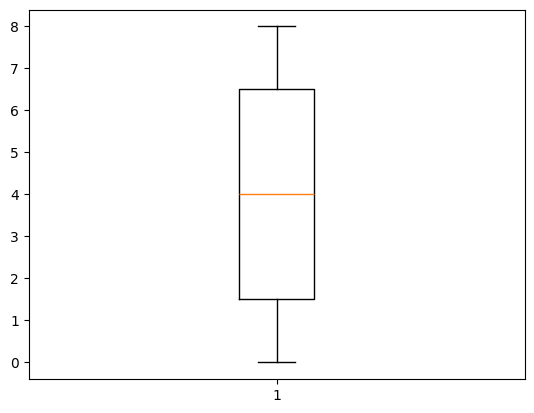

In [130]:
for i in df.columns:
    print(plt.boxplot(df[i]))
    plt.show()


In [131]:
df.head(2)

,Gender,Age,Height (cm),Weight (kg),Occupation,Marital Status,Income (USD),Favorite Color
0,1,32,175,70,16,1,75000,1
1,1,25,182,85,14,2,45000,2


In [132]:
scaler = MinMaxScaler()  
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [133]:
df_scaled.head(3)

,Gender,Age,Height (cm),Weight (kg),Occupation,Marital Status,Income (USD),Favorite Color
0,1.0,0.285714,0.500000,0.454545,0.888889,0.333333,0.095745,0.125
1,1.0,0.035714,0.733333,0.795455,0.777778,0.666667,0.031915,0.250
2,0.0,0.607143,0.000000,0.272727,0.333333,0.333333,0.191489,0.750


In [134]:
x=df_scaled.drop('Gender',inplace=False,axis=1)
y=df['Gender']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [145]:
print("📌 حجم بيانات التدريب:", X_train.shape)
print("📌 حجم بيانات الاختبار:", X_test.shape)

📌 حجم بيانات التدريب: (91, 7)
📌 حجم بيانات الاختبار: (40, 7)


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [147]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [148]:
y_pred = model.predict(X_test)

# طباعة الدقة والتقرير
print("📌 دقة النموذج:", accuracy_score(y_test, y_pred))
print("📌 تقرير التصنيف:\n", classification_report(y_test, y_pred))
print("📌 مصفوفة الالتباس:\n", confusion_matrix(y_test, y_pred))

📌 دقة النموذج: 1.0
📌 تقرير التصنيف:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

📌 مصفوفة الالتباس:
 [[18  0]
 [ 0 22]]


In [149]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [150]:
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

In [151]:
print(train_acc)
print(test_acc)


0.989010989010989
1.0


In [152]:
from sklearn.tree import DecisionTreeClassifier


In [160]:
model1 = DecisionTreeClassifier(max_depth=5, random_state=42)  
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [158]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 دقة النموذج: {accuracy:.4f}")
print("\n📊 تقرير التصنيف:\n", classification_report(y_test, y_pred))

🎯 دقة النموذج: 1.0000

📊 تقرير التصنيف:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

